<p>Logistic Regression Machine Learning Method Using Scikit Learn and Pandas</p>

In [18]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [12]:
address = 'C:/Users/Yousuf Khan/Downloads/mtcars.csv'
cars = pd.read_csv(address)
cars.columns= ['car_name', 'mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
cars_data=cars.ix[:,(5,11)].values
type(cars_data)
y=cars.ix[:,9].values

C:\Users\Yousuf Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Yousuf Khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


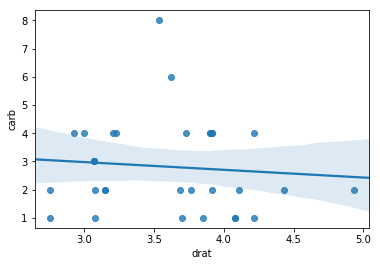

In [19]:
sb.regplot(x='drat', y='carb', data =cars ,scatter= True)

In [25]:
drat = cars['drat']
carb = cars['carb']
spearmanr_coefficient, p_value = spearmanr(drat, carb)
print((spearmanr_coefficient))
print('Spearmanr Rank Correlation Coefficient %0.3f)' % (spearmanr_coefficient))

-0.1252229399201802
Spearmanr Rank Correlation Coefficient -0.125)


In [26]:
cars.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
drat        0
wt          0
qsec        0
vs          0
am          0
gear        0
carb        0
dtype: int64

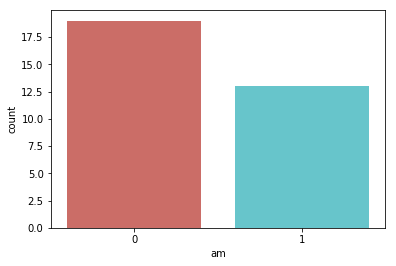

In [35]:
sb.countplot(x='am', data = cars, palette = 'hls')

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_name    32 non-null object
mpg         32 non-null float64
cyl         32 non-null int64
disp        32 non-null float64
hp          32 non-null int64
drat        32 non-null float64
wt          32 non-null float64
qsec        32 non-null float64
vs          32 non-null int64
am          32 non-null int64
gear        32 non-null int64
carb        32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [29]:
X = scale(cars_data)

In [30]:
LogReg = LogisticRegression()
LogReg.fit(X,y)
print(LogReg.score(X,y))

0.8125


C:\Users\Yousuf Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
y_pred = LogReg.predict(X)

In [32]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

   micro avg       0.81      0.81      0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32

